### **Bài 1: Gradient Descent:**

Cho hàm:
$$
f(w_1, w_2) = 0.1w_1^2 + 2w_2^2
$$

Cập nhật theo Gradient Descent:
$$
w_1 = w_1 - \alpha * dw_1, \quad w_2 = w_2 - \alpha * dw_2
$$

Với các đạo hàm:
$$
dw_1 = 0.2w_1, \quad dw_2 = 4w_2
$$

### **Khởi tạo:**
$\alpha = 0.4 \\ w_1 = -5 \\ w_2 = -2$

---

### **Epoch 1:**

**STEP 1:**  
Đạo hàm tại \( w_1 = -5, w_2 = -2 \):  
$$
dw_1 = 0.2 * w_1 = 0.2 * (-5) = -1.0 \\
dw_2 = 4 * w_2 = 4 * (-2) = -8.0
$$

**STEP 2:**  
Cập nhật giá trị:  
$$
w_1 = w_1 - \alpha * dw_1 = -5 - 0.4 * (-1.0) = -4.6 \\
w_2 = w_2 - \alpha * dw_2 = -2 - 0.4 * (-8.0) = 1.2
$$

---

### **Epoch 2:**

**STEP 3:**  
Đạo hàm tại \( w_1 = -4.6, w_2 = 1.2 \):  
$$
dw_1 = 0.2 * w_1 = 0.2 * (-4.6) = -0.92 \\
dw_2 = 4 * w_2 = 4 * 1.2 = 4.8
$$

**STEP 4:**  
Cập nhật giá trị:  
$$
w_1 = w_1 - \alpha * dw_1 = -4.6 - 0.4 * (-0.92) = -4.232 \\
w_2 = w_2 - \alpha * dw_2 = 1.2 - 0.4 * 4.8 = -0.72
$$


In [5]:
import numpy as np

def sgd(w, dw, lr):
    """
    Thực hiện thuật toán Stochastic Gradient Descent để update w1 và w2
    Args:
        w -- np.array: [w1, w2]
        dw -- np.array: [dw1, dw2], chứa giá trị đạo hàm theo w1 và w2
        lr -- float: learning rate
    Returns:
        w -- np.array: [w1, w2] w1 và w2 sau kho được update
    """
    w  = np.array(w)
    dw = np.array(dw)
    w = w - lr * dw
    return w

def df_w(w):
    """
    Tính gradient của f(w1, w2) = 0.1w1^2 + 2w2^2
    Args:
        w -- np.array: [w1, w2]
    Returns:
        dw -- np.array: [dw1, dw2], chứa giá trị đạo hàm theo w1 và w2
    """
    dw = [0.2 * w[0], 4 * w[1]]
    return dw


def train_sgd(optimizer, lr, epochs):
    """
    Thực hiện tìm điểm minimum của function(1) dựa vào 
    thuật toán được truyền vào từ optimizer
    Args:
        optimizer -- function: thực hiện thuật toán optimization cụ thể
        lr -- float: learning rate
        epochs -- int: số lần lặp (epoch) để tìm điểm minimum
    Returns:
        results -- list: chứa các cặp điểm [w1, w2] sau mỗi epoch(mỗi lần cập nhật)
    """

    # initial point
    W = np.array([-5, -2], dtype=np.float32)
    # list of results

    results = [W]

    # Tạo vòng lặp theo số lần epochs
    for i in range(epochs):
        # Tìm gradient dW gồm dw1 và dw2
        dw = df_w(W)
        # Update W
        W = optimizer(W, dw, lr)
        # append W vào list results
        results.append(W)

    return results

results_sgd = train_sgd(sgd, 0.4, 30)
results_sgd


[array([-5., -2.], dtype=float32),
 array([-4.6,  1.2]),
 array([-4.232, -0.72 ]),
 array([-3.89344,  0.432  ]),
 array([-3.5819648, -0.2592   ]),
 array([-3.29540762,  0.15552   ]),
 array([-3.03177501, -0.093312  ]),
 array([-2.78923301,  0.0559872 ]),
 array([-2.56609437, -0.03359232]),
 array([-2.36080682,  0.02015539]),
 array([-2.17194227, -0.01209324]),
 array([-1.99818689,  0.00725594]),
 array([-1.83833194, -0.00435356]),
 array([-1.69126538,  0.00261214]),
 array([-1.55596415, -0.00156728]),
 array([-1.43148702e+00,  9.40369969e-04]),
 array([-1.31696806e+00, -5.64221981e-04]),
 array([-1.21161061e+00,  3.38533189e-04]),
 array([-1.11468176e+00, -2.03119913e-04]),
 array([-1.02550722e+00,  1.21871948e-04]),
 array([-9.43466646e-01, -7.31231688e-05]),
 array([-8.67989314e-01,  4.38739013e-05]),
 array([-7.98550169e-01, -2.63243408e-05]),
 array([-7.34666155e-01,  1.57946045e-05]),
 array([-6.75892863e-01, -9.47676268e-06]),
 array([-6.21821434e-01,  5.68605761e-06]),
 array([-

## Bài 2. Gradient Descent + Momentum:

Cho hàm:
$$
f(w_1, w_2) = 0.1w_1^2 + 2w_2^2
$$

Cập nhật theo Gradient Descent + Momentum:
$$
\begin{aligned}
V_t &= \beta V_{t-1} + (1 - \beta)dW_t \\
W_t &= W_t - \alpha V_t
\end{aligned}
$$

Với các đạo hàm:
$$
\begin{aligned}
dw_1 &= 0.2w_1, \\
dw_2 &= 4w_2
\end{aligned}
$$

### **Khởi tạo:**  
$$
\begin{aligned}
\alpha &= 0.6, 
\beta &= 0.5, 
w_1 &= -5, 
w_2 &= -2, 
v_1 &= 0, 
v_2 &= 0
\end{aligned}
$$

---

### **Epoch 1:**

**STEP 1:**  
Đạo hàm tại \( w_1 = -5, w_2 = -2 \):  
$$
\begin{aligned}
dw_1 &= 0.2 * w_1 = 0.2 * (-5) = -1.0 \\
dw_2 &= 4 * w_2 = 4 * (-2) = -8.0
\end{aligned}
$$

**STEP 2:**  
Tìm giá trị \( v_1 \) và \( v_2 \):  
$$
\begin{aligned}
v_1 &= \beta v_1 + (1 - \beta) dw_1 = 0.5 * 0 + (1 - 0.5) * (-1.0) = -0.5 \\
v_2 &= \beta v_2 + (1 - \beta) dw_2 = 0.5 * 0 + (1 - 0.5) * (-8.0) = -4.0
\end{aligned}
$$

**STEP 3:**  
Cập nhật \( w_1 \) và \( w_2 \):  
$$
\begin{aligned}
w_1 &= w_1 - \alpha * v_1 = -5 - 0.6 * (-0.5) = -4.7 \\
w_2 &= w_2 - \alpha * v_2 = -2 - 0.6 * (-4.0) = 0.4
\end{aligned}
$$

---

### **Epoch 2:**

**STEP 4:**  
Đạo hàm tại \( w_1 = -4.7, w_2 = 0.4 \):  
$$
\begin{aligned}
dw_1 &= 0.2 * w_1 = 0.2 * (-4.7) = -0.94 \\
dw_2 &= 4 * w_2 = 4 * 0.4 = 1.6
\end{aligned}
$$

**STEP 5:**  
Tìm giá trị \( v_1 \) và \( v_2 \):  
$$
\begin{aligned}
v_1 &= \beta v_1 + (1 - \beta) dw_1 = 0.5 * (-0.5) + (1 - 0.5) * (-0.94) = -0.72 \\
v_2 &= \beta v_2 + (1 - \beta) dw_2 = 0.5 * (-4.0) + (1 - 0.5) * 1.6 = -1.2
\end{aligned}
$$

**STEP 6:**  
Cập nhật \( w_1 \) và \( w_2 \):  
$$
\begin{aligned}
w_1 &= w_1 - \alpha * v_1 = -4.7 - 0.6 * (-0.72) = -4.268 \\
w_2 &= w_2 - \alpha * v_2 = 0.4 - 0.6 * (-1.2) = 1.12
\end{aligned}
$$


In [7]:
def sgd_momentum(w, dw, lr, beta, v):
    """
    Thực hiện thuật toán Stochastic Gradient Descent with Momentum để update w1 và w2
    Args:
        w -- np.array: [w1, w2]
        dw -- np.array: [dw1, dw2], chứa giá trị đạo hàm theo w1 và w2
        lr -- float: learning rate
        beta -- float: hệ số momentum
        v -- np.array: [v1, v2], chứa giá trị momentum theo w1 và w2
    Returns:
        w -- np.array: [w1, w2] w1 và w2 sau khi được update
        v -- np.array: [v1, v2] giá trị momentum sau khi được update
    """
    
    v = beta * v + (1-beta) * dw
    w = w - lr * v
    return w, v

def df_w(w):
    """
    Tính gradient của dw1 và dw2
    Args:
        w -- np.array: [w1, w2]
    Returns:
        dw -- np.array: [dw1, dw2], chứa giá trị đạo hàm theo w1 và w2
    """
    dw = [0.2 * w[0], 4 * w[1]]
    return np.array(dw)

def train_sgd_momentum(optimizer, lr, epochs):
    """
    Thực hiện tìm điểm minimum của function(1) dựa vào 
    thuật toán được truyền vào từ optimizer
    Args:
        optimizer -- function: thực hiện thuật toán optimization cụ thể
        lr -- float: learning rate
        epochs -- int: số lần lặp (epoch) để tìm điểm minimum
    Returns:
        results -- list: chứa các cặp điểm [w1, w2] sau mỗi epoch(mỗi lần cập nhật)
    """

    # initial point
    W = np.array([-5, -2], dtype=np.float32)
    # initial velocity
    V = np.array([0, 0], dtype=np.float32)
    # list of results
    results = [W]

    # Tạo vòng lặp theo số lần epochs
    for i in range(epochs):
        # Tìm gradient dW gồm dw1 và dw2
        dw = df_w(W)
        # Update W và V
        W, V = optimizer(W, dw, lr, 0.5, V)
        # append W vào list results
        results.append(W)

    return results

results_sgd_momentum = train_sgd_momentum(sgd_momentum, 0.6, 30)
results_sgd_momentum

[array([-5., -2.], dtype=float32),
 array([-4.7,  0.4]),
 array([-4.268,  1.12 ]),
 array([-3.79592,  0.136  ]),
 array([-3.3321248, -0.5192   ]),
 array([-2.90029971, -0.22376   ]),
 array([-2.51036919,  0.192472  ]),
 array([-2.16478177,  0.1696216 ]),
 array([-1.86210116, -0.04534952]),
 array([-1.59903478, -0.09841566]),
 array([-1.37155951, -0.00684994]),
 array([-1.1755283 ,  0.04715285]),
 array([-1.006981  ,  0.01757082]),
 array([-0.86228849, -0.01830518]),
 array([-0.73820492, -0.01427696]),
 array([-0.63187084,  0.0048695 ]),
 array([-0.54079155,  0.00859933]),
 array([-4.62804416e-01,  1.45050014e-04]),
 array([-0.39604258, -0.00425615]),
 array([-0.33889911, -0.00134937]),
 array([-0.28999343,  0.00172326]),
 array([-0.24814098,  0.00119166]),
 array([-0.2123263 , -0.00050413]),
 array([-0.18167938, -0.00074707]),
 array([-1.55455157e-01,  2.79448010e-05]),
 array([-0.13301574,  0.00038192]),
 array([-1.13815082e-01,  1.00603444e-04]),
 array([-0.09738585, -0.00016078]),
 

## Bài 3 RMSProp:

Cho hàm:
$$
f(w_1, w_2) = 0.1w_1^2 + 2w_2^2
$$

Cập nhật theo RMSProp:
$$
\begin{aligned}
S_t &= \gamma S_{t-1} + (1 - \gamma)dW_t^2 \\
W_t &= W_t - \alpha \cdot \frac{dW_t}{\sqrt{S_t + \epsilon}}
\end{aligned}
$$

Với các đạo hàm:
$$
\begin{aligned}
dw_1 &= 0.2w_1, \\
dw_2 &= 4w_2
\end{aligned}
$$

### **Khởi tạo:**  
<!-- \(\alpha = 0.3, \gamma = 0.9, \epsilon = 10^{-6}, w_1 = -5, w_2 = -2, s_1 = 0, s_2 = 0\) -->

$$
\begin{aligned}
\alpha &= 0.3, \\
\gamma &= 0.9, \\
\epsilon &= 10^{-6}, \\
w_1 &= -5, \\
w_2 &= -2, \\
s_1 &= 0, \\
s_2 &= 0
\end{aligned}
$$

---

### **Epoch 1:**

**STEP 1:**  
Đạo hàm tại \( w_1 = -5, w_2 = -2 \):  
$$
\begin{aligned}
dw_1 &= 0.2 \cdot w_1 = 0.2 \cdot (-5) = -1.0 \\
dw_2 &= 4 \cdot w_2 = 4 \cdot (-2) = -8.0
\end{aligned}
$$

**STEP 2:**  
Tìm giá trị \( s_1 \) và \( s_2 \):  
$$
\begin{aligned}
s_1 &= \gamma s_1 + (1 - \gamma) dw_1^2 = 0.9 \cdot 0 + (1 - 0.9) \cdot (-1.0)^2 = 0.1 \\
s_2 &= \gamma s_2 + (1 - \gamma) dw_2^2 = 0.9 \cdot 0 + (1 - 0.9) \cdot (-8.0)^2 = 6.4
\end{aligned}
$$

**STEP 3:**  
Cập nhật \( w_1 \) và \( w_2 \):  
$$
\begin{aligned}
w_1 &= w_1 - \alpha \cdot \frac{dw_1}{\sqrt{s_1 + \epsilon}} = -5 - 0.3 \cdot \frac{-1.0}{\sqrt{0.1 + 10^{-6}}} = -4.051 \\
w_2 &= w_2 - \alpha \cdot \frac{dw_2}{\sqrt{s_2 + \epsilon}} = -2 - 0.3 \cdot \frac{-8.0}{\sqrt{6.4 + 10^{-6}}} = -1.051
\end{aligned}
$$

---

### **Epoch 2:**

**STEP 4:**  
Đạo hàm tại \( w_1 = -4.051, w_2 = -1.051 \):  
$$
\begin{aligned}
dw_1 &= 0.2 \cdot w_1 = 0.2 \cdot (-4.051) = -0.810 \\
dw_2 &= 4 \cdot w_2 = 4 \cdot (-1.051) = -4.205
\end{aligned}
$$

**STEP 5:**  
Tìm giá trị \( s_1 \) và \( s_2 \):  
$$
\begin{aligned}
s_1 &= \gamma s_1 + (1 - \gamma) dw_1^2 = 0.9 \cdot 0.1 + (1 - 0.9) \cdot (-0.810)^2 = 0.156 \\
s_2 &= \gamma s_2 + (1 - \gamma) dw_2^2 = 0.9 \cdot 6.4 + (1 - 0.9) \cdot (-4.205)^2 = 7.528
\end{aligned}
$$

**STEP 6:**  
Cập nhật \( w_1 \) và \( w_2 \):  
$$
\begin{aligned}
w_1 &= w_1 - \alpha \cdot \frac{dw_1}{\sqrt{s_1 + \epsilon}} = -4.051 - 0.3 \cdot \frac{-0.810}{\sqrt{0.156 + 10^{-6}}} = -3.435 \\
w_2 &= w_2 - \alpha \cdot \frac{dw_2}{\sqrt{s_2 + \epsilon}} = -1.051 - 0.3 \cdot \frac{-4.205}{\sqrt{7.528 + 10^{-6}}} = -0.592
\end{aligned}
$$


In [8]:
import numpy as np

def rmsprop(w, dw, lr, gamma, s, epsilon=1e-8):
    """
    Thực hiện thuật toán RMSProp để update w1 và w2
    Args:
        w -- np.array: [w1, w2]
        dw -- np.array: [dw1, dw2], chứa giá trị đạo hàm theo w1 và w2
        lr -- float: learning rate
        gamma -- float: hệ số decay
        s -- np.array: [s1, s2], chứa giá trị lưu vết bình phương gradient
        epsilon -- float: giá trị nhỏ tránh chia cho 0
    Returns:
        w -- np.array: [w1, w2] w1 và w2 sau khi được update
        s -- np.array: [s1, s2] giá trị lưu vết sau khi được update
    """
    # Cập nhật giá trị lưu vết S_t
    s = gamma * s + (1 - gamma) * (dw ** 2)
    # Cập nhật W_t
    w = w - lr * dw / np.sqrt(s + epsilon)
    return w, s

def df_w(w):
    """
    Tính gradient của dw1 và dw2
    Args:
        w -- np.array: [w1, w2]
    Returns:
        dw -- np.array: [dw1, dw2], chứa giá trị đạo hàm theo w1 và w2
    """
    dw = [0.2 * w[0], 4 * w[1]]
    return np.array(dw)

def train_rmsprop(optimizer, lr, epochs):
    """
    Thực hiện tìm điểm minimum của function(1) dựa vào thuật toán RMSProp
    Args:
        optimizer -- function: thực hiện thuật toán optimization cụ thể
        lr -- float: learning rate
        epochs -- int: số lần lặp (epoch) để tìm điểm minimum
    Returns:
        results -- list: chứa các cặp điểm [w1, w2] sau mỗi epoch(mỗi lần cập nhật)
    """

    # Điểm khởi tạo ban đầu
    W = np.array([-5, -2], dtype=np.float32)
    # Giá trị lưu vết ban đầu
    S = np.array([0.0, 0.0], dtype=np.float32)
    # Danh sách kết quả
    results = [W]

    # Vòng lặp theo số epochs
    for i in range(epochs):
        # Tìm gradient dW gồm dw1 và dw2
        dw = df_w(W)
        # Cập nhật W và S
        W, S = optimizer(W, dw, lr, 0.9, S)
        # Thêm kết quả vào danh sách
        results.append(W)

    return results

results_rmsprop = train_rmsprop(rmsprop, lr=0.3, epochs=30)
results_rmsprop

[array([-5., -2.], dtype=float32),
 array([-4.05131675, -1.0513167 ]),
 array([-3.4351913 , -0.59152335]),
 array([-2.9589299 , -0.32943934]),
 array([-2.56545541, -0.17756477]),
 array([-2.22919779, -0.09163252]),
 array([-1.93625965, -0.04494496]),
 array([-1.67816897, -0.02081422]),
 array([-1.44934202, -0.00903558]),
 array([-1.2458743, -0.0036459]),
 array([-1.06489551, -0.00135351]),
 array([-9.04195011e-01, -4.56443632e-04]),
 array([-7.61989552e-01, -1.37562623e-04]),
 array([-6.36771909e-01, -3.62599993e-05]),
 array([-5.27209041e-01, -8.11334482e-06]),
 array([-4.32072737e-01, -1.47472696e-06]),
 array([-3.50193194e-01, -2.02782639e-07]),
 array([-2.80429810e-01, -1.84229373e-08]),
 array([-2.21655480e-01, -7.67729023e-10]),
 array([-1.72751643e-01,  7.80467851e-12]),
 array([-1.32611743e-01, -5.05808592e-13]),
 array([-1.00150851e-01,  6.19143032e-14]),
 array([-7.43192815e-02, -1.13377735e-14]),
 array([-5.41180470e-02,  2.80177276e-15]),
 array([-3.86142076e-02, -8.8137676

## Bài 4 Adam:

Cho hàm:
$$
f(w_1, w_2) = 0.1w_1^2 + 2w_2^2
$$

Cập nhật theo Adam:
$$
\begin{aligned}
V_t &= \beta_1 V_{t-1} + (1 - \beta_1)dW_t \\
S_t &= \beta_2 S_{t-1} + (1 - \beta_2)dW_t^2 \\
V_{corr} &= \frac{V_t}{1 - \beta_1^t} \\
S_{corr} &= \frac{S_t}{1 - \beta_2^t} \\
W_t &= W_t - \alpha \cdot \frac{V_{corr}}{\sqrt{S_{corr}} + \epsilon}
\end{aligned}
$$

Với các đạo hàm:
$$
\begin{aligned}
dW_1 &= 0.2w_1, \\
dW_2 &= 4w_2
\end{aligned}
$$

### **Khởi tạo:**  
<!-- \(\alpha = 0.2, \beta_1 = 0.9, \beta_2 = 0.999, \epsilon = 10^{-6}, w_1 = -5, w_2 = -2, v_1 = 0, v_2 = 0, s_1 = 0, s_2 = 0\) -->

$$
\begin{aligned}
    \alpha &= 0.2, \\
    \epsilon &= 10^{-6}, \\
    \beta_1 &= 0.9, \beta_2 = 0.999, \\
    w_1 &= -5, w_2 = -2, \\
    v_1 &= 0, v_2 = 0, \\
    s_1 &= 0, s_2 = 0
\end{aligned}
$$


---

### **Epoch 1:**

**STEP 1:**  
Đạo hàm tại \( w_1 = -5, w_2 = -2 \):  
$$
\begin{aligned}
dW_1 &= 0.2 \cdot w_1 = 0.2 \cdot (-5) = -1.0 \\
dW_2 &= 4 \cdot w_2 = 4 \cdot (-2) = -8.0
\end{aligned}
$$

**STEP 2:**  
Tìm giá trị \( v_1 \) và \( v_2 \):  
$$
\begin{aligned}
v_1 &= \beta_1 v_1 + (1 - \beta_1) dW_1 = 0.9 \cdot 0 + (1 - 0.9) \cdot (-1.0) = -0.1 \\
v_2 &= \beta_1 v_2 + (1 - \beta_1) dW_2 = 0.9 \cdot 0 + (1 - 0.9) \cdot (-8.0) = -0.8
\end{aligned}
$$

**STEP 3:**  
Tìm giá trị \( s_1 \) và \( s_2 \):  
$$
\begin{aligned}
s_1 &= \beta_2 s_1 + (1 - \beta_2) dW_1^2 = 0.999 \cdot 0 + (1 - 0.999) \cdot (-1.0)^2 = 0.001 \\
s_2 &= \beta_2 s_2 + (1 - \beta_2) dW_2^2 = 0.999 \cdot 0 + (1 - 0.999) \cdot (-8.0)^2 = 0.064
\end{aligned}
$$

**STEP 4:**  
Bias-correction:  
$$
\begin{aligned}
v_{corr1} &= \frac{v_1}{1 - \beta_1^1} = \frac{-0.1}{1 - 0.9} = -1.0 \\
v_{corr2} &= \frac{v_2}{1 - \beta_1^1} = \frac{-0.8}{1 - 0.9} = -8.0 \\
s_{corr1} &= \frac{s_1}{1 - \beta_2^1} = \frac{0.001}{1 - 0.999} = 1.0 \\
s_{corr2} &= \frac{s_2}{1 - \beta_2^1} = \frac{0.064}{1 - 0.999} = 64.0
\end{aligned}
$$

**STEP 5:**  
Cập nhật \( w_1 \) và \( w_2 \):  
$$
\begin{aligned}
w_1 &= w_1 - \alpha \cdot \frac{v_{corr1}}{\sqrt{s_{corr1}} + \epsilon} = -5 - 0.2 \cdot \frac{-1.0}{\sqrt{1.0} + 10^{-6}} = -4.8 \\
w_2 &= w_2 - \alpha \cdot \frac{v_{corr2}}{\sqrt{s_{corr2}} + \epsilon} = -2 - 0.2 \cdot \frac{-8.0}{\sqrt{64.0} + 10^{-6}} = -1.8
\end{aligned}
$$

---

### **Epoch 2:**

**STEP 6:**  
Đạo hàm tại \( w_1 = -4.8, w_2 = -1.8 \):  
$$
\begin{aligned}
dW_1 &= 0.2 \cdot w_1 = 0.2 \cdot (-4.8) = -0.96 \\
dW_2 &= 4 \cdot w_2 = 4 \cdot (-1.8) = -7.2
\end{aligned}
$$

**STEP 7:**  
Tìm giá trị \( v_1 \) và \( v_2 \):  
$$
\begin{aligned}
v_1 &= \beta_1 v_1 + (1 - \beta_1) dW_1 = 0.9 \cdot (-0.1) + (1 - 0.9) \cdot (-0.96) = -0.186 \\
v_2 &= \beta_1 v_2 + (1 - \beta_1) dW_2 = 0.9 \cdot (-0.8) + (1 - 0.9) \cdot (-7.2) = -1.44
\end{aligned}
$$

**STEP 8:**  
Tìm giá trị \( s_1 \) và \( s_2 \):  
$$
\begin{aligned}
s_1 &= \beta_2 s_1 + (1 - \beta_2) dW_1^2 = 0.999 \cdot 0.001 + (1 - 0.999) \cdot (-0.96)^2 = 0.00192 \\
s_2 &= \beta_2 s_2 + (1 - \beta_2) dW_2^2 = 0.999 \cdot 0.064 + (1 - 0.999) \cdot (-7.2)^2 = 0.115776
\end{aligned}
$$

**STEP 9:**  
Bias-correction:  
$$
\begin{aligned}
v_{corr1} &= \frac{v_1}{1 - \beta_1^2} = \frac{-0.186}{1 - 0.9^2} = -0.979 \\
v_{corr2} &= \frac{v_2}{1 - \beta_1^2} = \frac{-1.44}{1 - 0.9^2} = -7.579 \\
s_{corr1} &= \frac{s_1}{1 - \beta_2^2} = \frac{0.00192}{1 - 0.999^2} = 0.96078 \\
s_{corr2} &= \frac{s_2}{1 - \beta_2^2} = \frac{0.115776}{1 - 0.999^2} = 57.917
\end{aligned}
$$

**STEP 10:**  
Cập nhật \( w_1 \) và \( w_2 \):  
$$
\begin{aligned}
w_1 &= w_1 - \alpha \cdot \frac{v_{corr1}}{\sqrt{s_{corr1}} + \epsilon} = -4.8 - 0.2 \cdot \frac{-0.979}{\sqrt{0.96078} + 10^{-6}} = -4.600 \\
w_2 &= w_2 - \alpha \cdot \frac{v_{corr2}}{\sqrt{s_{corr2}} + \epsilon} = -1.8 - 0.2 \cdot \frac{-7.579}{\sqrt{57.917} + 10^{-6}} = -1.600
\end{aligned}
$$


In [9]:
import numpy as np

def adam(w, dw, lr, beta1, beta2, v, s, t, epsilon=1e-8):
    """
    Thực hiện thuật toán Adam để cập nhật w1 và w2
    Args:
        w -- np.array: [w1, w2]
        dw -- np.array: [dw1, dw2], gradient theo w1 và w2
        lr -- float: learning rate
        beta1 -- float: hệ số momentum
        beta2 -- float: hệ số lưu vết bình phương gradient
        v -- np.array: [v1, v2], giá trị momentum
        s -- np.array: [s1, s2], giá trị lưu vết bình phương gradient
        t -- int: số lần cập nhật (epoch)
        epsilon -- float: giá trị nhỏ tránh chia cho 0
    Returns:
        w -- np.array: [w1, w2] giá trị w sau khi cập nhật
        v -- np.array: [v1, v2] giá trị momentum sau khi cập nhật
        s -- np.array: [s1, s2] giá trị lưu vết sau khi cập nhật
    """
    # Cập nhật V_t và S_t
    v = beta1 * v + (1 - beta1) * dw
    s = beta2 * s + (1 - beta2) * (dw ** 2)

    # Bias correction cho V_t và S_t
    v_corr = v / (1 - beta1 ** t)
    s_corr = s / (1 - beta2 ** t)

    # Cập nhật W_t
    w = w - lr * v_corr / (np.sqrt(s_corr) + epsilon)
    return w, v, s

def df_w(w):
    """
    Tính gradient của dw1 và dw2
    Args:
        w -- np.array: [w1, w2]
    Returns:
        dw -- np.array: [dw1, dw2], chứa giá trị đạo hàm theo w1 và w2
    """
    dw = [0.2 * w[0], 4 * w[1]]
    return np.array(dw)

def train_adam(optimizer, lr, epochs):
    """
    Thực hiện tìm điểm minimum của function(1) dựa vào thuật toán Adam
    Args:
        optimizer -- function: thực hiện thuật toán optimization cụ thể
        lr -- float: learning rate
        epochs -- int: số lần lặp (epoch) để tìm điểm minimum
    Returns:
        results -- list: chứa các cặp điểm [w1, w2] sau mỗi epoch (mỗi lần cập nhật)
    """

    # Điểm khởi tạo ban đầu
    W = np.array([-5, -2], dtype=np.float32)
    # Giá trị momentum ban đầu
    V = np.array([0.0, 0.0], dtype=np.float32)
    # Giá trị lưu vết bình phương gradient ban đầu
    S = np.array([0.0, 0.0], dtype=np.float32)
    # Danh sách kết quả
    results = [W]

    # Vòng lặp theo số epochs
    for t in range(1, epochs + 1):
        # Tìm gradient dW gồm dw1 và dw2
        dw = df_w(W)
        # Cập nhật W, V, và S
        W, V, S = optimizer(W, dw, lr, 0.9, 0.999, V, S, t)
        # Thêm kết quả vào danh sách
        results.append(W)

    return results

results_adam = train_adam(adam, lr=0.2, epochs=30)
results_adam

[array([-5., -2.], dtype=float32),
 array([-4.8, -1.8]),
 array([-4.60025438, -1.60082446]),
 array([-4.40094787, -1.40317254]),
 array([-4.20227683, -1.20787812]),
 array([-4.00444931, -1.01592731]),
 array([-3.80768515, -0.82847291]),
 array([-3.61221588, -0.6468414 ]),
 array([-3.41828457, -0.47252744]),
 array([-3.22614552, -0.30716911]),
 array([-3.03606383, -0.1524983 ]),
 array([-2.84831476, -0.010263  ]),
 array([-2.66318293,  0.11787579]),
 array([-2.4809613 ,  0.23046188]),
 array([-2.30194989,  0.32635896]),
 array([-2.12645433,  0.40484219]),
 array([-1.95478404,  0.46564983]),
 array([-1.78725024,  0.50898818]),
 array([-1.62416364,  0.53549457]),
 array([-1.46583189,  0.54617155]),
 array([-1.31255677,  0.54230819]),
 array([-1.16463123,  0.52540208]),
 array([-1.02233622,  0.49709058]),
 array([-0.88593741,  0.45909504]),
 array([-0.75568187,  0.41317771]),
 array([-0.63179484,  0.36110876]),
 array([-0.51447651,  0.30464031]),
 array([-0.40389908,  0.24548389]),
 array(

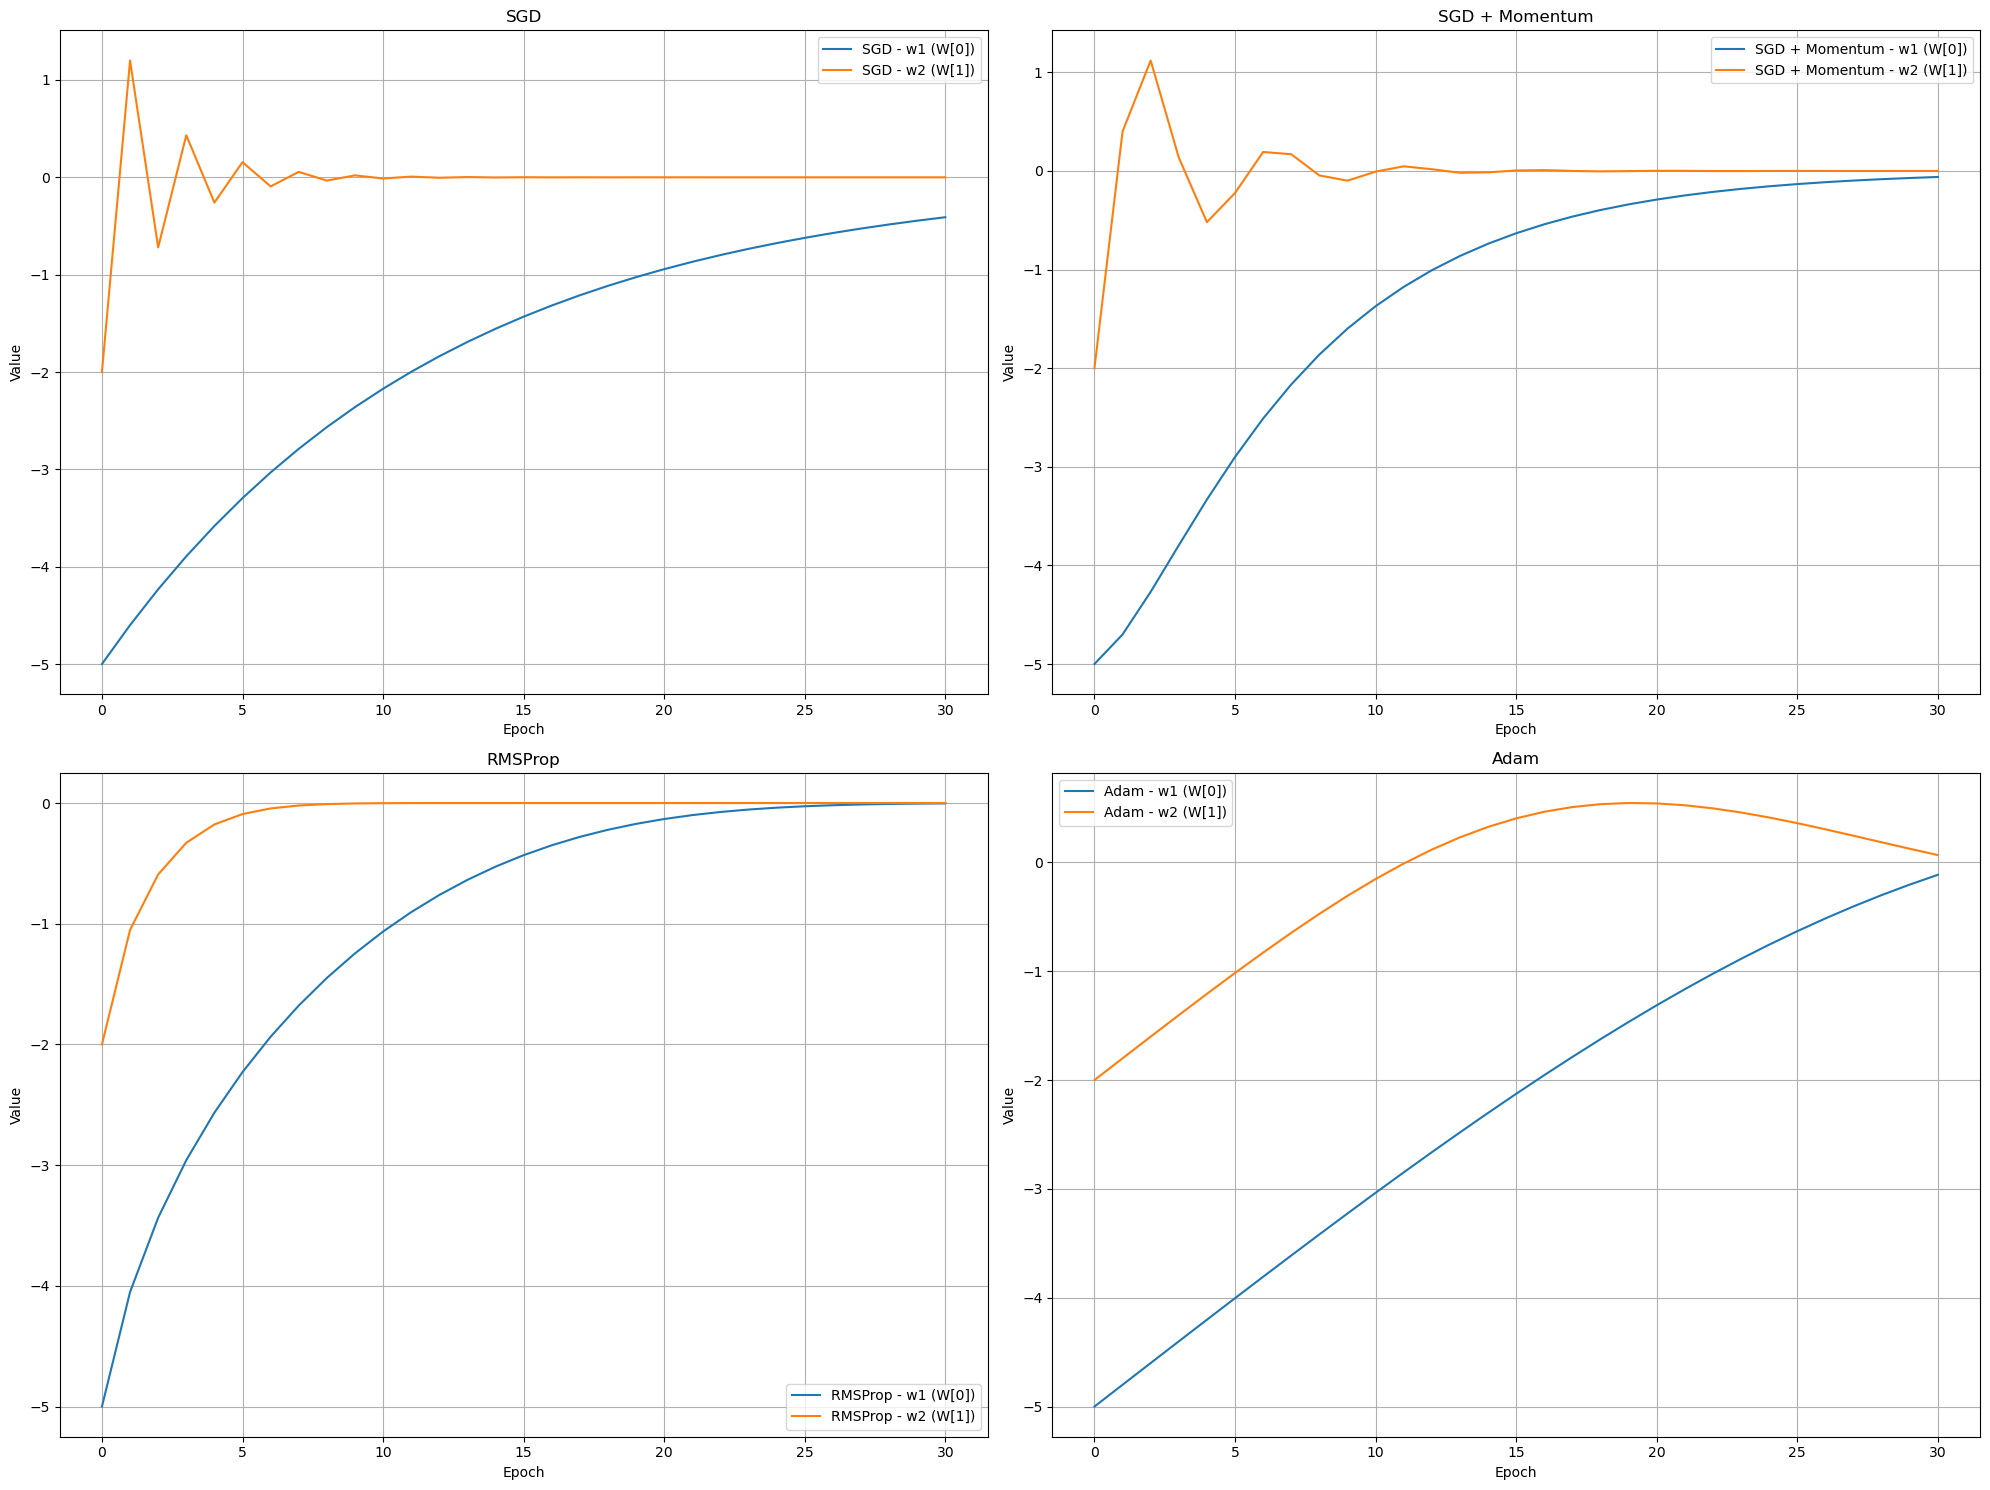

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Chuyển đổi các kết quả sang NumPy array
results_sgd = np.array(results_sgd)
results_sgd_momentum = np.array(results_sgd_momentum)
results_rmsprop = np.array(results_rmsprop)
results_adam = np.array(results_adam)

# Tạo figure
plt.figure(figsize=(20, 15))

# Biểu đồ 1: SGD
plt.subplot(2, 2, 1)
plt.plot(results_sgd[:, 0], label="SGD - w1 (W[0])")
plt.plot(results_sgd[:, 1], label="SGD - w2 (W[1])")
plt.xlabel("Epoch")
plt.ylabel("Value")
plt.title("SGD")
plt.legend()
plt.grid()

# Biểu đồ 2: SGD + Momentum
plt.subplot(2, 2, 2)
plt.plot(results_sgd_momentum[:, 0], label="SGD + Momentum - w1 (W[0])")
plt.plot(results_sgd_momentum[:, 1], label="SGD + Momentum - w2 (W[1])")
plt.xlabel("Epoch")
plt.ylabel("Value")
plt.title("SGD + Momentum")
plt.legend()
plt.grid()

# Biểu đồ 3: RMSProp
plt.subplot(2, 2, 3)
plt.plot(results_rmsprop[:, 0], label="RMSProp - w1 (W[0])")
plt.plot(results_rmsprop[:, 1], label="RMSProp - w2 (W[1])")
plt.xlabel("Epoch")
plt.ylabel("Value")
plt.title("RMSProp")
plt.legend()
plt.grid()

# Biểu đồ 4: Adam
plt.subplot(2, 2, 4)
plt.plot(results_adam[:, 0], label="Adam - w1 (W[0])")
plt.plot(results_adam[:, 1], label="Adam - w2 (W[1])")
plt.xlabel("Epoch")
plt.ylabel("Value")
plt.title("Adam")
plt.legend()
plt.grid()

# Hiển thị các biểu đồ
plt.tight_layout()
plt.show()
